In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
!unzip '/content/CropProduction.zip'

Archive:  /content/CropProduction.zip
replace crop_production.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
data = pd.read_csv('crop_production.csv')

Understanding the data and Preprocessing

In [4]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [6]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
data['Production'].replace(np.nan,0,inplace = True)

In [8]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

Meaningful Insights from data

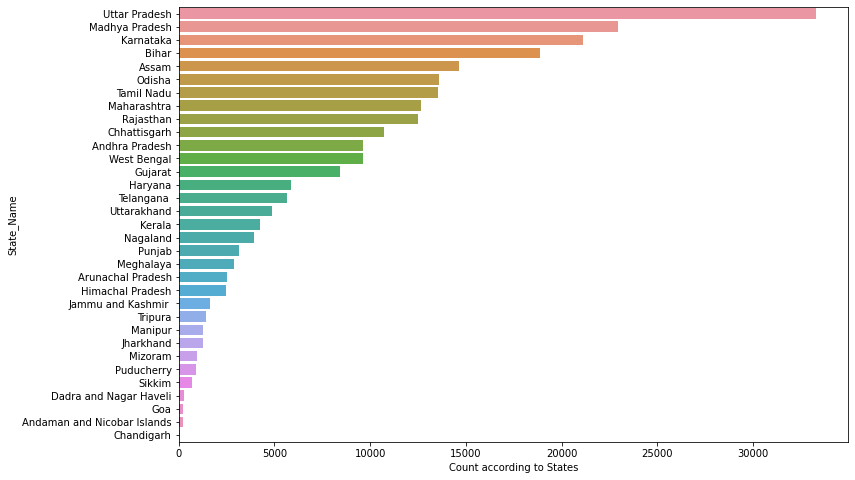

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(y='State_Name',data=data,order=data['State_Name'].value_counts().index)
plt.xlabel('Count according to States')
plt.show()

Uttar Pradesh is the state with highest crop production followed by Madhya Pradesh at number 2

Production with respect to years

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


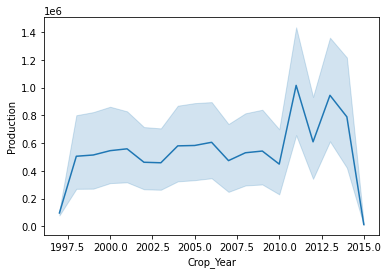

In [32]:
sns.lineplot(data["Crop_Year"],data["Production"])

We see that there is a commendable increase especially in thr years of 2010 to 2014 but there is a steep fall in production in 2015 due to some reasons

Production in each season

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


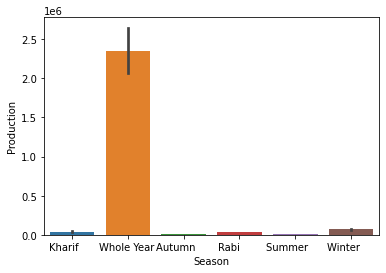

In [33]:
sns.barplot(data["Season"],data["Production"])

The production rate of whole year crops is significantly more than that of other seasonal crops due to feasibility.

Area in States for cultivation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


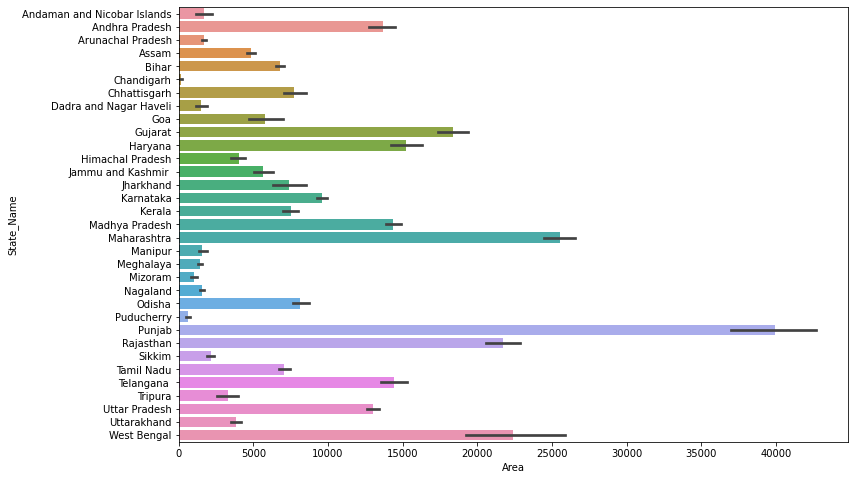

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(data['Area'],data['State_Name'])

The total land for cultivation is highest for Punjab followed by Maharashtra and West Bengal 

Production per unit area

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


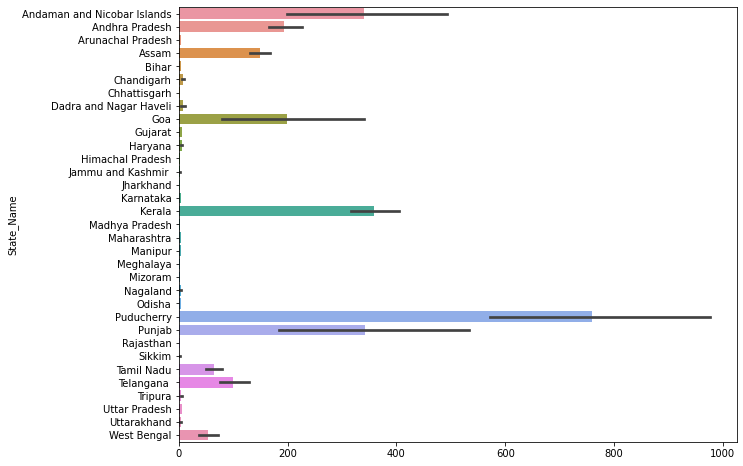

In [53]:
plt.figure(figsize=(10,8))
data1 = data['Production']/data['Area']
sns.barplot(data1,data['State_Name'])

Th highest production per unit area is for Puducherry which means Puducherry makes the best use of the limited land.

In [34]:
data.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006827
Area,-0.026022,1.000000,0.040655
Production,0.006827,0.040655,1.000000


There is very less correlation between all the numeric attributes 

In [63]:
from itertools import product
corr_var1 = ('State_Name','District_Name','Season','Crop')
corr_var2 = ('State_Name','District_Name','Season','Crop')
corr_var_prod = list(product(corr_var1,corr_var2, repeat = 1))

In [65]:
import scipy.stats as ss
result = []
for i in corr_var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(data[i[0]], data[i[1]])))[1]))

In [66]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,Crop,District_Name,Season,State_Name
var1,,,,
Crop,NaN,0.0,0.0,0.0
District_Name,0.0,NaN,0.0,0.0
Season,0.0,0.0,NaN,0.0
State_Name,0.0,0.0,0.0,NaN


There is definitely some association between crops, districts, states and seasons.